In [ ]:
#dataset taken from https://www.kaggle.com/competitions/mlsp-2014-mri/data

In [1]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#importing machine learning libary

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

In [3]:
#importing training data
labels_train = pd.read_csv('train_labels.csv')
SBM_train = pd.read_csv('train_SBM.csv')

In [32]:
#importing testing data
SBM_test = pd.read_csv('test_SBM.csv')

In [5]:
labels_train.head()

,Id,Class
0,120873,1
1,135376,0
2,139149,0
3,146791,0
4,153870,1


In [6]:
SBM_train.iloc[:, 1:]

,SBM_map1,SBM_map2,SBM_map3,SBM_map4,SBM_map5,SBM_map6,SBM_map7,SBM_map8,SBM_map10,SBM_map13,...,SBM_map55,SBM_map61,SBM_map64,SBM_map67,SBM_map69,SBM_map71,SBM_map72,SBM_map73,SBM_map74,SBM_map75
0,0.725065,-0.639254,0.353069,-0.981707,-1.419971,-0.441321,-0.264192,0.711579,0.641798,0.339658,...,-0.078220,-0.982331,1.070363,0.220316,0.776855,-2.022404,1.203256,1.083516,0.564201,-0.002006
1,-1.328855,0.502970,0.013232,1.128496,-0.070738,0.398476,-0.466051,-0.435455,0.342847,-0.672254,...,0.989571,-0.057543,0.371701,-0.513081,-0.457550,1.476216,0.381052,0.163436,0.403782,-0.295125
2,0.732268,-1.241554,0.654942,-0.289216,0.158316,0.029165,1.439242,-0.832816,1.285468,-2.132901,...,-0.257114,0.597229,1.220756,-0.059213,-0.435494,-0.092971,1.090910,-0.448562,-0.508497,0.350434
3,-0.343917,-1.052519,-1.150521,0.765989,0.923129,0.674052,-0.492673,1.282388,-1.914583,-1.269851,...,-0.295110,0.829697,-0.450726,-0.791032,-1.115821,-0.022296,-0.245844,-0.705539,0.061344,0.448966
4,-0.208685,-0.562697,-0.362164,1.025571,0.151690,-0.130410,-1.105922,0.502029,-0.097735,1.561833,...,1.342273,-0.978412,0.158492,0.889753,0.795368,0.738788,0.475415,2.340384,2.516038,-0.551440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,-0.271233,-0.441043,-2.241210,-2.005569,0.118265,-0.665987,-0.515736,0.526771,-0.953451,-0.063827,...,0.512424,0.826910,-0.225792,0.369724,-0.565693,-0.045074,1.094329,-0.345906,-0.014453,0.567717
82,-0.703690,-0.173818,-1.322392,0.180619,0.106367,0.975193,-0.933527,-0.501655,-0.376133,-0.373754,...,-0.430485,0.482055,0.073327,-0.455141,-0.681228,0.948131,0.443656,0.092495,0.683039,0.977018
83,-1.925477,-1.256874,0.731867,-1.462804,-0.486504,-0.251175,-0.523021,-0.408961,0.299555,-1.448230,...,0.314668,-0.114078,-0.476524,-0.556896,0.505738,0.873278,0.040048,0.211690,0.536933,-0.424864
84,1.308627,-0.402656,0.844227,0.386164,-0.335097,-0.072352,0.462689,0.604192,0.458415,0.117089,...,0.453766,-0.163926,0.953385,0.402673,0.025229,-1.975778,0.112912,-2.014501,-1.661052,-0.421040


In [7]:
#splitting the data into testing and training data to test for accuracy 
X = SBM_train.iloc[:, 1:]
y = labels_train["Class"]

#the training data needs to be split because we do not have the labels for the training data
#in order to calculate accuracy we need to see how well the model predicts
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 35)

In [8]:
#starting off with a sinlge model to try and see if the model can work on the data

model = SVC(C = 8)
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f'Support Vector Classifier test accuracy {test_score:.3}')

Support Vector Classifier test accuracy 0.727


In [37]:
#introducing several models to compare

models = {'KNN': KNeighborsClassifier(n_neighbors = 8), 'Random Forest': RandomForestClassifier(), 'SVC': SVC()}

In [38]:
#calculating the inital model accuracy for each model, before parameter tuning 
for name, model in models.items():
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f'{name} test accuracy {test_score:.3}')
    

KNN test accuracy 0.591
Random Forest test accuracy 0.682
SVC test accuracy 0.682


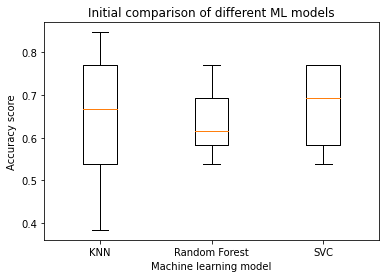

In [39]:

results = []
for model in models.values():
    kf = KFold(n_splits = 5, random_state = 35, shuffle = True)
    cv_score = cross_val_score(model, X_train, y_train, cv = kf)
    results.append(cv_score)

# a general overveiw of how the difference in accuracies 
plt.boxplot(results, labels=models.keys())
plt.ylabel('Accuracy score')
plt.xlabel('Machine learning model')
plt.title('Initial comparison of different ML models')
plt.show()

## Hyperparamater tuning 

### 1. Support vector classifier 

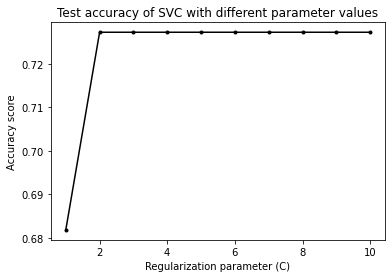

In [58]:
#comparing the model accuracy for different values of c

C = np.linspace(1, 10, 10)
scores = []

for c in C:
    model = SVC(C = c)
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    scores.append(test_score)
    
plt.figure()
plt.plot(C, scores, marker = '.', color = 'black')
plt.ylabel('Accuracy score')
plt.xlabel('Regularization parameter (C)')
plt.title('Test accuracy of SVC with different parameter values')
plt.show()

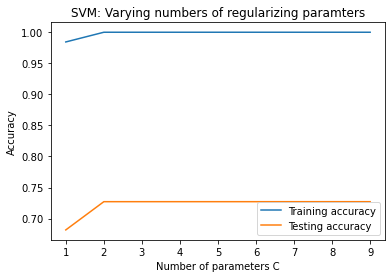

In [62]:
#since the training and testing accuracy is important to balance, I compare both 
train_accuracies = {}
test_accuracies = {}
C = np.arange(1, 10)

#trying different values for the model paramter c, which is the number of regularizing parameters used to classify a datum
for c in C:
    SVM = SVC(C = c)
    SVM.fit(X_train, y_train)
    train_accuracies[c] = SVM.score(X_train, y_train)
    test_accuracies[c] = SVM.score(X_test, y_test)

#plotting the accuracies using different parameter values to account for underfitting or overfitting
plt.title("SVM: Varying numbers of regularizing paramters")
plt.plot(C, train_accuracies.values(), label = 'Training accuracy')
plt.plot(C, test_accuracies.values(), label = 'Testing accuracy')
plt.legend()
plt.xlabel("Number of parameters C")
plt.ylabel("Accuracy")
plt.show()

In [74]:
#tuning for only one parameter doesn't give us very credible results so I use Cross validation to tune for several paramters.
kf = KFold(n_splits = 5, shuffle = True, random_state=43)
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

svm = SVC()
svm_cv = GridSearchCV(svm, param_grid, cv = kf)
svm_cv.fit(X_train, y_train)
print(svm_cv.best_params_, svm_cv.best_score_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'} 0.7346153846153847


## KNearest neighbours

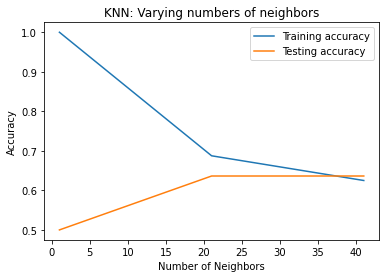

In [15]:
#paramter tuning for KNN
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 50, 20)

#trying different values for the model paramter n_neighbors, which is the number of neighbors used to classify a datum
for n in neighbors:
    KNN = KNeighborsClassifier(n_neighbors = n)
    KNN.fit(X_train, y_train)
    train_accuracies[n] = KNN.score(X_train, y_train)
    test_accuracies[n] = KNN.score(X_test, y_test)

#plotting the accuracies using different parameter values to account for underfitting or overfitting
plt.title("KNN: Varying numbers of neighbors")
plt.plot(neighbors, train_accuracies.values(), label = 'Training accuracy')
plt.plot(neighbors, test_accuracies.values(), label = 'Testing accuracy')
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [17]:
#corss validation
kf = KFold(n_splits = 5, shuffle = True, random_state=43)
param_grid = {'leaf_size': np.arange(1, 50), 'n_neighbors':np.arange(1, 30), 'p':[1,2]}

KNN = KNeighborsClassifier()
KNN_cv = GridSearchCV(KNN, param_grid, cv = kf)
KNN_cv.fit(X_train, y_train)
print(KNN_cv.best_params_, KNN_cv.best_score_)

{'leaf_size': 1, 'n_neighbors': 7, 'p': 1} 0.7038461538461538


## Random forest

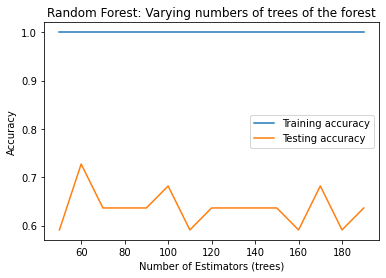

In [68]:
#paramter tuning for Random forest
train_accuracies = {}
test_accuracies = {}
n = np.arange(50, 200, 10)

#trying different values for the model paramter n_estimators, which are the number of individual decision trees used in random forest
for estimator in n:
    RFC = RandomForestClassifier(n_estimators = estimator)
    RFC.fit(X_train, y_train)
    train_accuracies[estimator] = RFC.score(X_train, y_train)
    test_accuracies[estimator] = RFC.score(X_test, y_test)
    
#plotting the accuracies using different parameter values to account for underfitting or overfitting
plt.title("Random Forest: Varying numbers of trees of the forest")
plt.plot(n, train_accuracies.values(), label = 'Training accuracy')
plt.plot(n, test_accuracies.values(), label = 'Testing accuracy')
plt.legend()
plt.xlabel("Number of Estimators (trees)")
plt.ylabel("Accuracy")
plt.show()

In [21]:
#cross validation
kf = KFold(n_splits = 5, shuffle = True, random_state=43)
param_grid = {'bootstrap': [True, False],
 'max_depth': np.arange(1, 50, 10),
 'n_estimators': np.arange(1, 500, 100)}

RFC = RandomForestClassifier()
RFC_cv = GridSearchCV(RFC, param_grid, cv = kf)
RFC_cv.fit(X_train, y_train)
print(RFC_cv.best_params_, RFC_cv.best_score_)

{'bootstrap': False, 'max_depth': 11, 'n_estimators': 201} 0.6884615384615385


## Model comparison

In [57]:
#comparing the model accuracy for the best parameters
models = {'KNN': KNeighborsClassifier(leaf_size=1, n_neighbors=7, p=1), 
          'Random Forest': RandomForestClassifier(max_depth = 11, n_estimators =  201, bootstrap = False), 
          'SVC': SVC(C=10, gamma=0.01, kernel='rbf')}

for name, model in models.items():
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f'{name} test accuracy {test_score:.3}')
    

KNN test accuracy 0.636
Random Forest test accuracy 0.591
SVC test accuracy 0.773


## Model Prediction

In [37]:
#predicting the labels using the training data. I use SVC because it had the highest accruacy

X = SBM_test.iloc[:, 1:]

SVM = SVC(C=10, gamma=0.01, kernel='rbf')
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X)
y_pred

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [48]:
y_pred.shape 

(119748,)

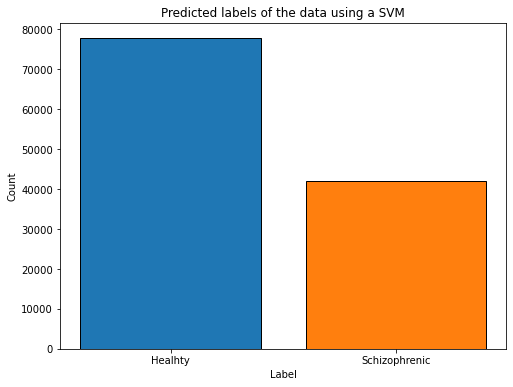

In [56]:
#plotting the label classification using SVC

y = [len(y_pred) - np.count_nonzero(y_pred), np.count_nonzero(y_pred)]
x = ['Healhty', 'Schizophrenic']
plt.figure(figsize = (8, 6))
plt.bar(x, y, color = ['C0', 'C1'], edgecolor = 'black')
plt.ylabel('Count')
plt.xlabel('Label')
plt.title('Predicted labels of the data using a SVM')
plt.show()